Link download datasets: https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD

# Import Library

In [5]:
# Import Library yang dibutuhkan
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Loading

In [6]:
# Melihat datasets
df = pd.read_csv('/content/BTC-USD.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-07-19,7378.200195,7494.459961,7295.459961,7466.859863,7466.859863,5.111630e+09
1,2018-07-20,7467.399902,7594.669922,7323.259766,7354.129883,7354.129883,4.936870e+09
2,2018-07-21,7352.720215,7437.640137,7262.410156,7419.290039,7419.290039,3.726610e+09
3,2018-07-22,7417.799805,7537.950195,7383.819824,7418.490234,7418.490234,3.695460e+09
4,2018-07-23,7414.709961,7771.500000,7409.100098,7711.109863,7711.109863,5.132480e+09


In [7]:
print(f'Data memiliki {df.shape[0]} data dan {df.shape[1]} kolom/fitur.')

Data memiliki 1827 data dan 7 kolom/fitur.


# Exploratory Data Analysis

Dataset ini memiliki 1827 baris data dan 7 kolom :

1.   Date : Tanggal data tersebut direkam
2.   Open : Harga pembukaan pada hari tersebut
3.   High : Harga tertinggi pada hari tersebut
4.   Low : Harga terendah pada hari tersebut
5.   Close : Harga penutupan pada hari tersebut
6.   Adj Close (Adjusted Close) : Harga penutupan pada hari tersebut setelah disesuaikan dengan aksi korporasi seperti right issue, stock split atau stock reverse
7.   Volume : Banyaknya transaksi pada hari tersebut

In [8]:
#Mengecek data apakah memiliki missing value atau tidak
print(df.isnull().sum())

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64


In [9]:
col_with_missing = [col for col in df.columns if df[col].isnull().any()]
print('Kolom dengan missing value:', col_with_missing)

Kolom dengan missing value: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
df[col_with_missing] = imputer.fit_transform(df[col_with_missing])

In [12]:
print('Total missing value dalam dataframe:', df.isnull().sum().sum(), 'records')

Total missing value dalam dataframe: 0 records


## Explore Statistic Information

Sebuah data pasti memiliki informasi statistik pada masing-masing kolom, antara lain:

1.   Count : Jumlah data pada setiap kolom
2.   Mean : Nilai rata-rata pada setiam kolom
3.   Std : Standar deviasi pada setiap kolom
4.   Min : Nilai minimum pada setiap kolom
5.   25% : Kuartil pertama
6.   50% : Kuartil kedua atau biasa juga disebut median (nilai tengah)
7.   75% : Kuartil ketiga
8.   Max : Nilai maksimum pada setiap kolom



In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1827 non-null   object 
 1   Open       1827 non-null   float64
 2   High       1827 non-null   float64
 3   Low        1827 non-null   float64
 4   Close      1827 non-null   float64
 5   Adj Close  1827 non-null   float64
 6   Volume     1827 non-null   float64
dtypes: float64(6), object(1)
memory usage: 100.0+ KB


In [14]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1.827000e+03
mean,22180.013759,22702.286844,21610.729893,22190.342206,22190.342206,2.798786e+10
std,16590.256546,17022.662569,16086.824489,16583.229912,16583.229912,1.902478e+10
min,3236.274658,3275.377930,3191.303467,3236.761719,3236.761719,3.064030e+09
25%,8354.311524,8589.328125,8200.300781,8371.267090,8371.267090,1.606121e+10
50%,17364.546875,17853.939453,17100.835938,17446.292969,17446.292969,2.537256e+10
75%,33767.375000,34778.076172,32265.797851,33734.515625,33734.515625,3.613765e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


## Data visualiation

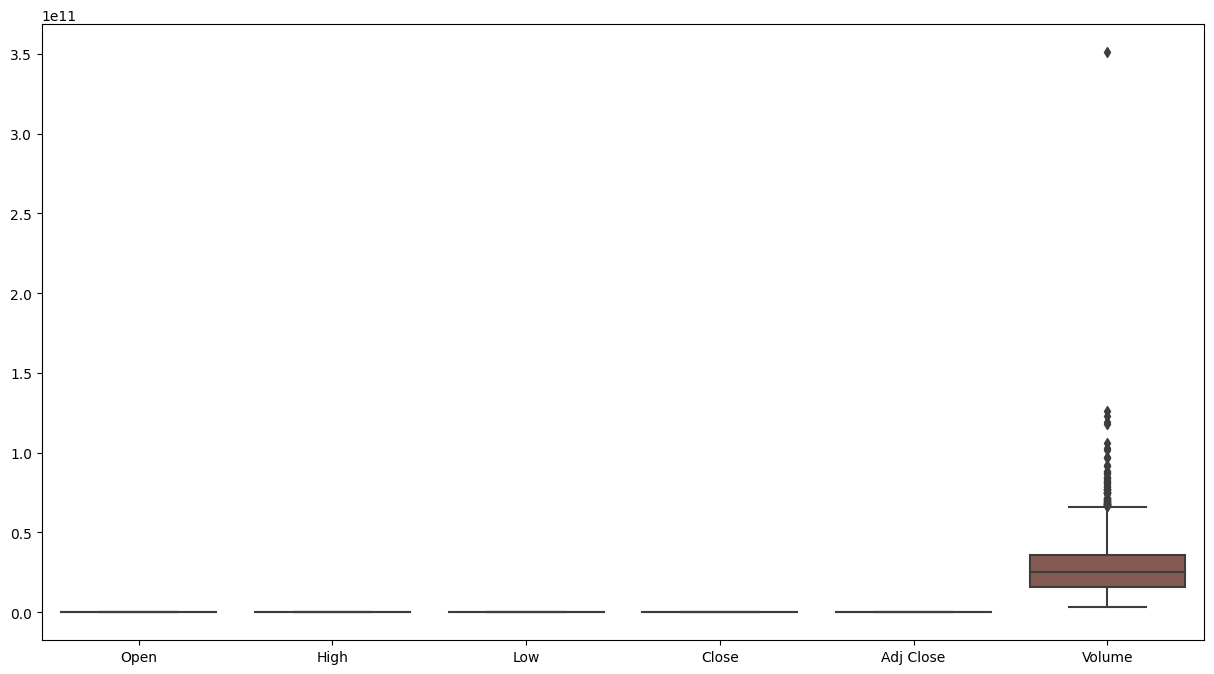

In [15]:
# Mencari outlier pada sebuah data
numerical_col = [col for col in df.columns if df[col].dtypes == 'float64']
plt.figure(figsize=(15,8))
sns.boxplot(data=df[numerical_col])
plt.show()

Hal pertama yang perlu Anda lakukan adalah membuat batas bawah dan batas atas. Untuk membuat batas bawah, kurangi Q1 dengan 1,5 * IQR. Kemudian, untuk membuat batas atas, tambahkan 1.5 * IQR dengan Q3

In [16]:
Q1 = df.quantile(.25)
Q3 = df.quantile(.75)
IQR = Q3 - Q1
bottom = Q1 - 1.5 * IQR
top = Q3 + 1.5 * IQR
df = df[~((df < bottom) | (df > top)).any(axis=1)]
df.head()

<ipython-input-16-533f5a00873d>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(.25)
<ipython-input-16-533f5a00873d>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(.75)
<ipython-input-16-533f5a00873d>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < bottom) | (df > top)).any(axis=1)]


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-07-19,7378.200195,7494.459961,7295.459961,7466.859863,7466.859863,5.111630e+09
1,2018-07-20,7467.399902,7594.669922,7323.259766,7354.129883,7354.129883,4.936870e+09
2,2018-07-21,7352.720215,7437.640137,7262.410156,7419.290039,7419.290039,3.726610e+09
3,2018-07-22,7417.799805,7537.950195,7383.819824,7418.490234,7418.490234,3.695460e+09
4,2018-07-23,7414.709961,7771.500000,7409.100098,7711.109863,7711.109863,5.132480e+09


In [17]:
# Cek ukuran dataset setelah kita drop outliers
df.shape

(1758, 7)

## Univariate Analysis

Fitur yang diprediksi adalah "Adj Close"

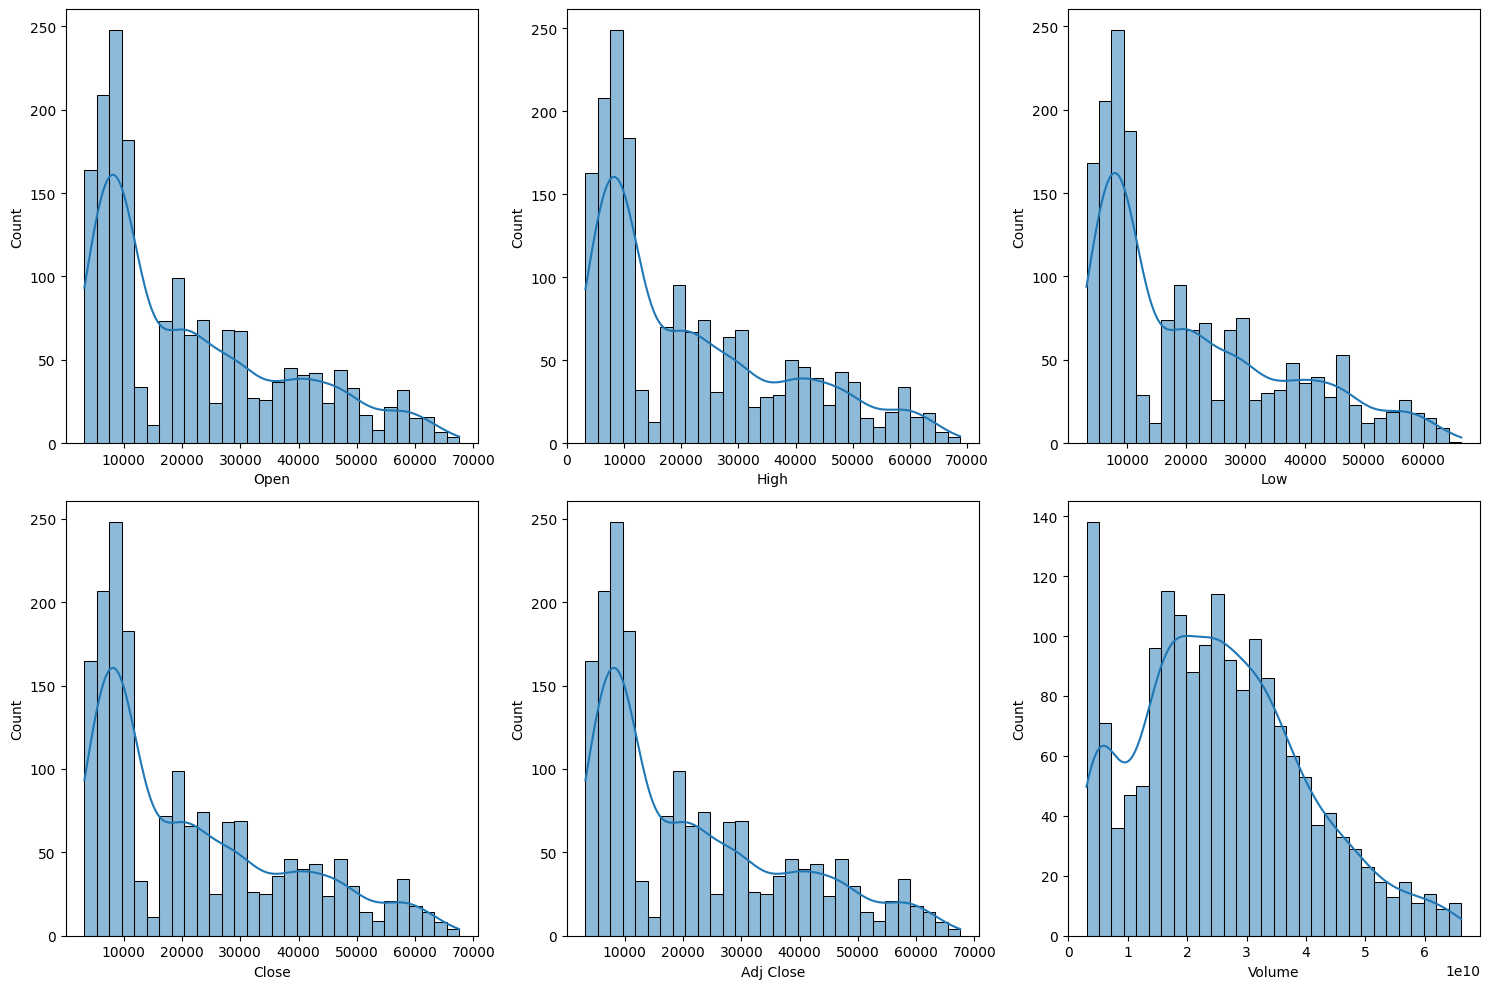

In [18]:
cols = 3
rows = 2
fig = plt.figure(figsize=(cols * 5, rows * 5))

for i, col in enumerate(numerical_col):
  ax = fig.add_subplot(rows, cols, i + 1)
  sns.histplot(x=df[col], bins=30, kde=True, ax=ax)
fig.tight_layout()
plt.show()


## Multivariate Analysis

Selanjutnya kita akan menganalisis korelasi fitur "Adj Close" terhadap fitur lain. Dapat disimpulkan bahwa "Adj Close" memiliki korelasi positif yang kuat terhadap fitur "Open", "High", "Low" dan "Close", sedangkan untuk fitur "Volume" memiliki korelasi sedang terhadap fitur "Adj Close"

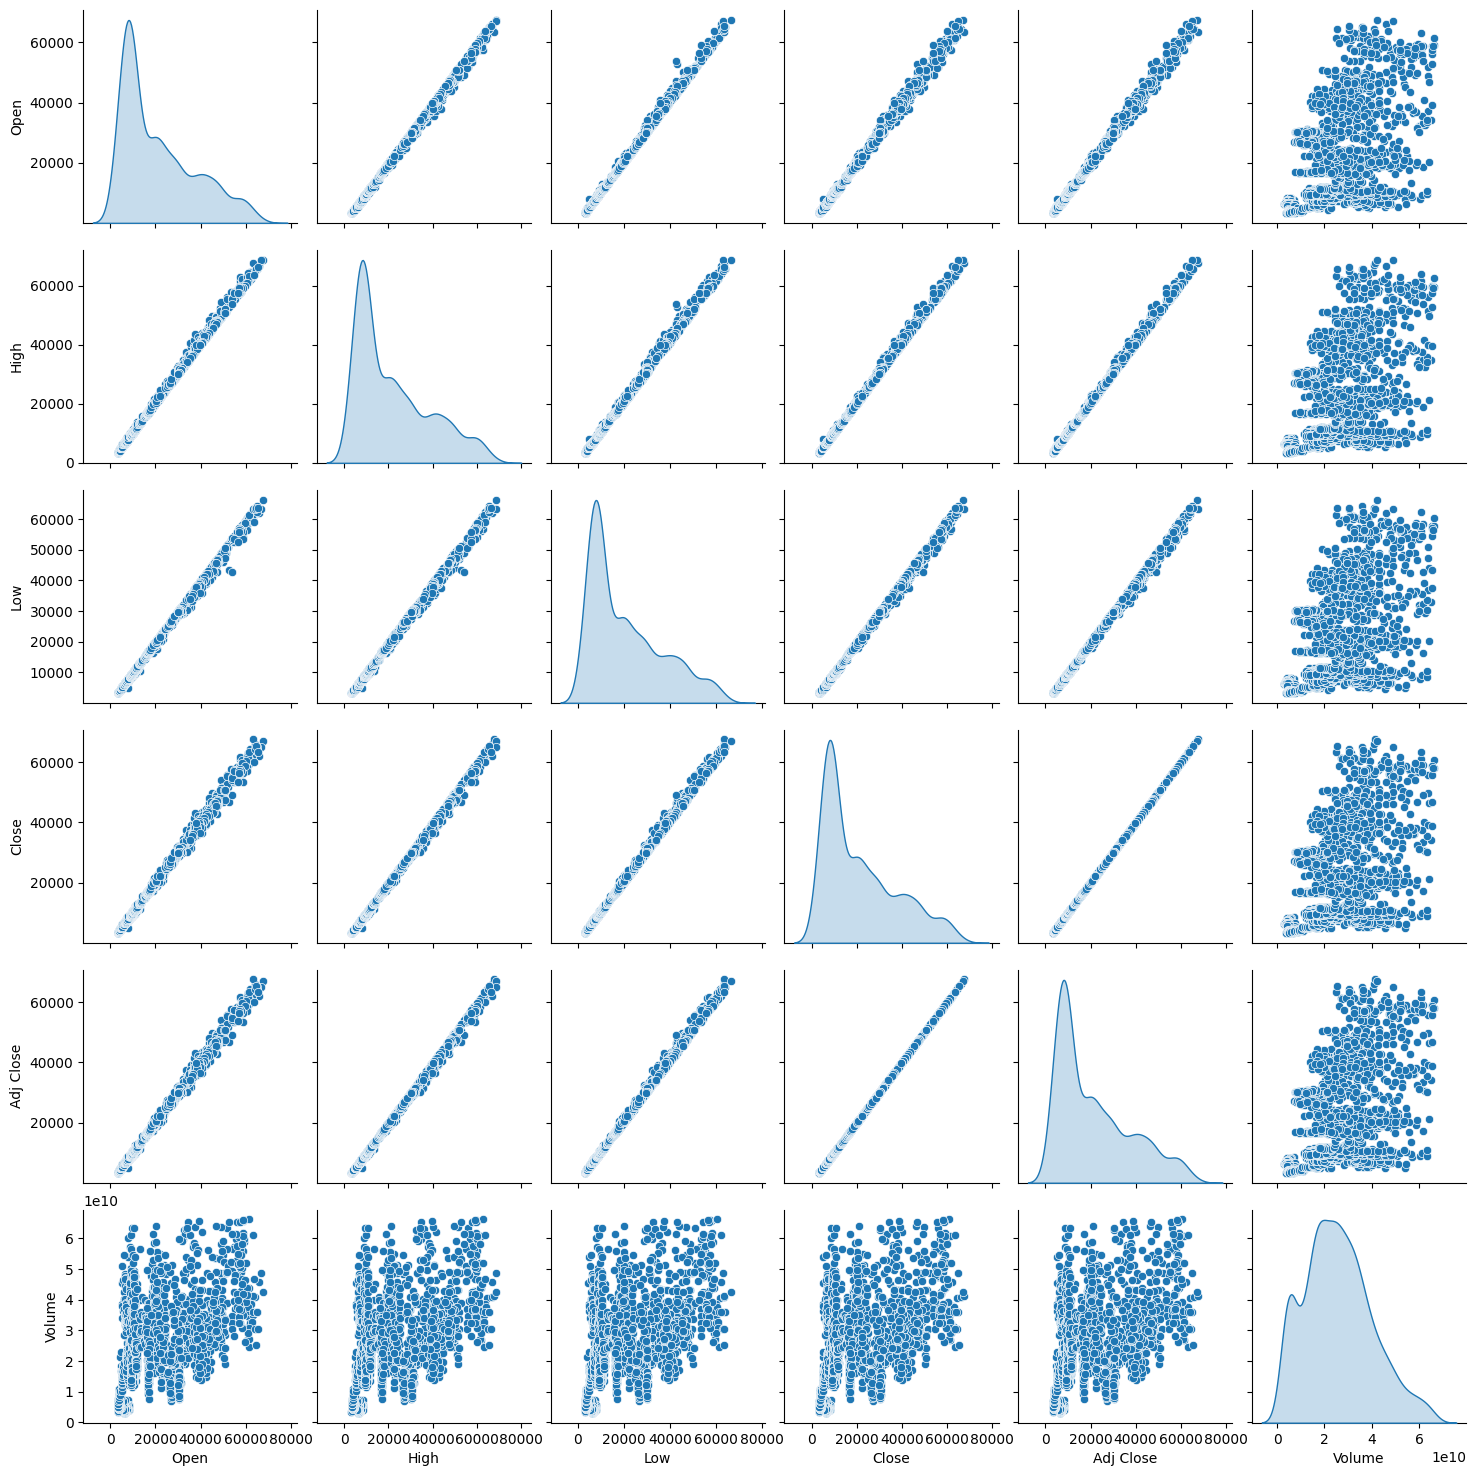

In [19]:
sns.pairplot(df[numerical_col], diag_kind='kde')
plt.show()

Untuk melihat korelasi lebih jelas, kita dapat menggunakan heatmap dari library seaborn

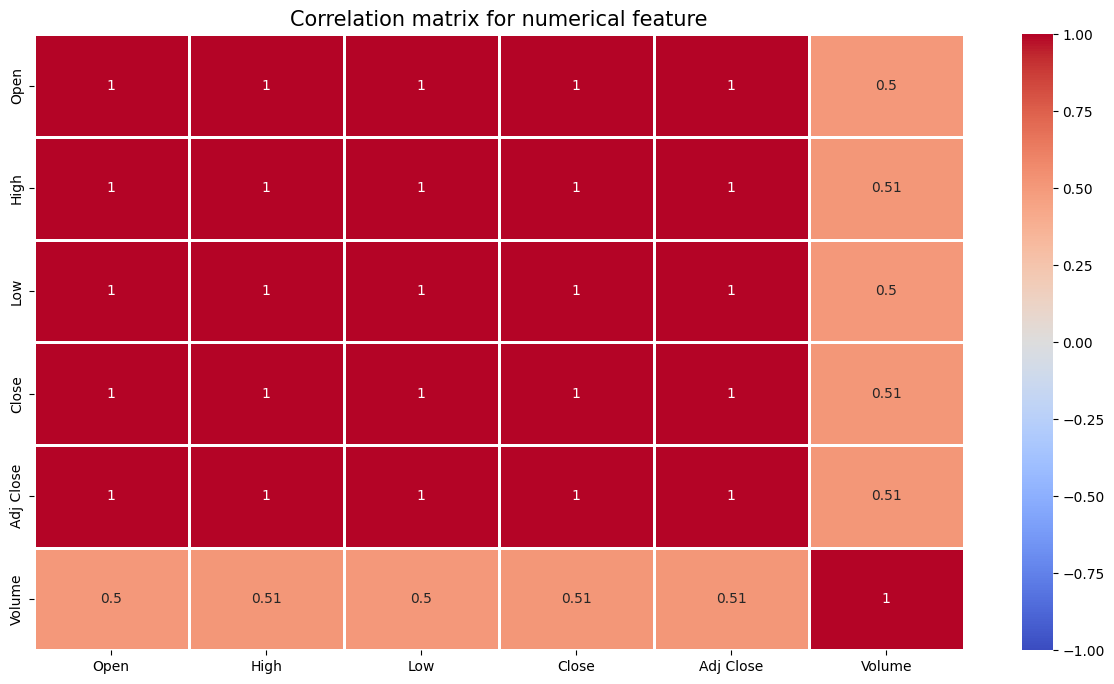

In [20]:
plt.figure(figsize=(15,8))
corr = df[numerical_col].corr().round(2)
sns.heatmap(data=corr, annot=True, vmin=-1, vmax=1, cmap='coolwarm', linewidth=1)
plt.title('Correlation matrix for numerical feature', size=15)
plt.show()

# Data Preparation

Data pada kolom "Date", "Volume", dan "Close" akan dihapus dikarenakan tidak diperlukan oleh model.

In [21]:
# library for data preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

In [22]:
df = df.drop(['Date', 'Volume', 'Close'], axis=1)
df.head()

,Open,High,Low,Adj Close
0,7378.200195,7494.459961,7295.459961,7466.859863
1,7467.399902,7594.669922,7323.259766,7354.129883
2,7352.720215,7437.640137,7262.410156,7419.290039
3,7417.799805,7537.950195,7383.819824,7418.490234
4,7414.709961,7771.500000,7409.100098,7711.109863


## Splitting Dataset

In [23]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [24]:
# Split dat menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [25]:
print('Total X_train:', len(X_train), 'records')
print('Total y_train:', len(y_train), 'records')
print('Total X_test:', len(X_test), 'records')
print('Total y_test:', len(y_test), 'records')

Total X_train: 1406 records
Total y_train: 1406 records
Total X_test: 352 records
Total y_test: 352 records


## Data Normalization

Proses normalisasi menggunakan library MinMaxScaler. Fungsi normalisasi diterapkan agar model lebih cepat dalam mempelajari data karena data telah diubah pada rentang tertentu seperti antara 0 dan 1

In [26]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
#models = pd.DataFrame(columns=['train_mse', 'test_mse'], index=['SVR', 'KNN', 'GradientBoosting'])

# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])



# Modeling

In [28]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [29]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

In [30]:
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

In [31]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# Model Evaluation

In [33]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,224.948421,250.571543
RF,39.708247,241.512412
Boosting,2787.927751,2699.85754


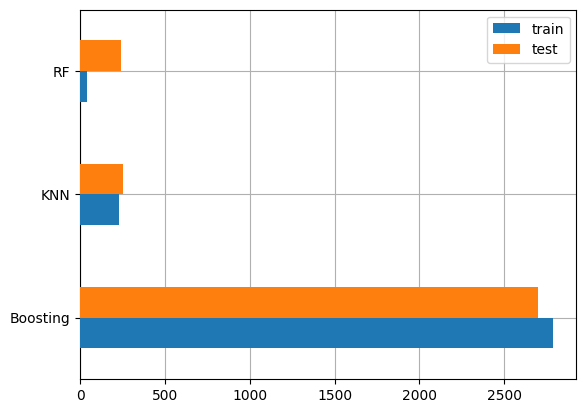

In [34]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari gambar di atas, terlihat bahwa, model Random Forest (RF) memberikan nilai eror yang paling kecil. Sedangkan model dengan algoritma Boosting memiliki eror yang paling besar (berdasarkan grafik, angkanya di atas 2500). Model inilah yang akan kita pilih sebagai model terbaik untuk melakukan prediksi harga bitcoin.